In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/Data/", "another*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
       Axial  Tangential  Radial  fault
0       1.73       -3.22    8.83      0
1      -2.12       -0.82   11.49      0
2      -2.39        1.53   10.87      0
3       1.18        4.71    9.34      0
4       0.55       -0.27    7.14      0
...      ...         ...     ...    ...
16949  -2.00        3.77   11.10      1
16950   1.41        1.84   11.38      1
16951   0.24        5.26    9.02      1
16952  -3.49        1.33   12.04      1
16953  -2.12       -0.47   10.47      1

[16954 rows x 4 columns]


In [ ]:
df.shape

(16954, 4)

In [ ]:
df.fault.value_counts()

1    8553
0    8401
Name: fault, dtype: int64

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
x = df.drop('fault', axis=1)
y = df['fault']
oversample = BorderlineSMOTE()   
x, y = oversample.fit_resample(x, y)


In [ ]:
print(x)
print(y)

          Axial  Tangential     Radial
0      1.730000   -3.220000   8.830000
1     -2.120000   -0.820000  11.490000
2     -2.390000    1.530000  10.870000
3      1.180000    4.710000   9.340000
4      0.550000   -0.270000   7.140000
...         ...         ...        ...
17101 -2.029965    1.104948  10.564983
17102 -2.635269    0.031856  12.729522
17103  1.895838   -0.752741   7.683300
17104  0.528829    0.632343   8.291757
17105 -1.486788    1.741862  13.842768

[17106 rows x 3 columns]
0        0
1        0
2        0
3        0
4        0
        ..
17101    0
17102    0
17103    0
17104    0
17105    0
Name: fault, Length: 17106, dtype: int64


In [ ]:
df.head()

,Axial,Tangential,Radial,fault
0,1.73,-3.22,8.83,0
1,-2.12,-0.82,11.49,0
2,-2.39,1.53,10.87,0
3,1.18,4.71,9.34,0
4,0.55,-0.27,7.14,0


<Axes: xlabel='Radial', ylabel='Axial'>

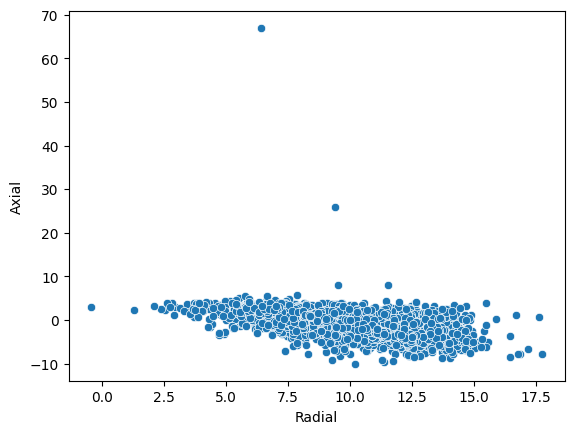

In [ ]:
sns.scatterplot(x=df['Radial'], y=df['Axial'])

<Axes: xlabel='Tangential'>

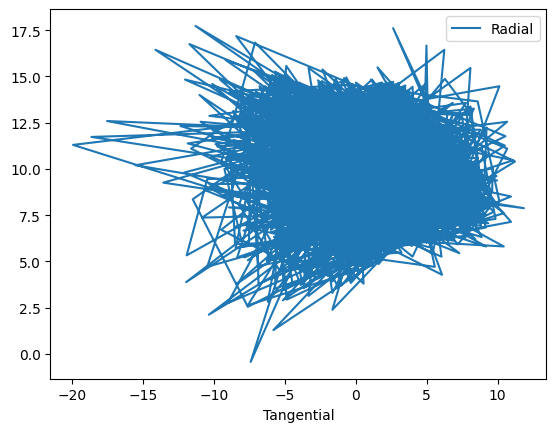

In [ ]:
df.plot('Tangential','Radial')

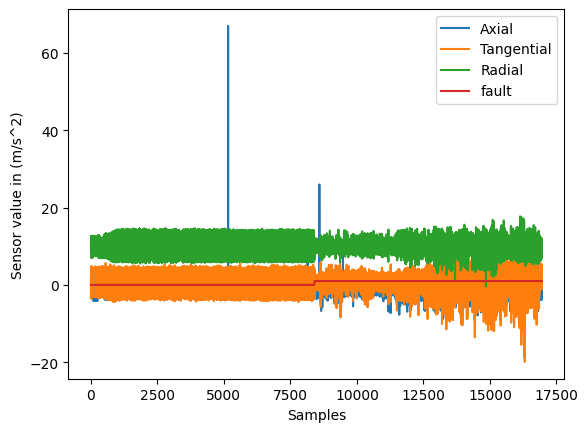

In [ ]:
df.plot()
plt.xlabel("Samples")
plt.ylabel("Sensor value in (m/s^2)")

plt.show()

In [ ]:
SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns)
df_scaled

,Axial,Tangential,Radial
0,1.366010,-1.394099,-0.502604
1,-0.867880,-0.545485,0.818462
2,-1.024543,0.285449,0.510544
3,1.046882,1.409863,-0.249317
4,0.681337,-0.351011,-1.341928
...,...,...,...
17101,-0.815639,0.135155,0.359060
17102,-1.166856,-0.244278,1.434060
17103,1.462234,-0.521703,-1.072103
17104,0.669053,-0.031953,-0.769918


In [ ]:
X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2)

In [ ]:
X_train

,Axial,Tangential,Radial
14184,0.292582,-0.046924,-0.467839
1795,-1.274042,-0.160073,0.023836
8249,1.249963,0.964340,-0.408242
2828,-0.229626,1.158814,0.470813
11797,-0.113580,-1.213768,-1.068776
...,...,...,...
16356,1.841799,2.491845,-0.914817
3740,0.727755,-0.145929,-1.927965
12090,0.339000,-0.269686,0.644638
14770,0.797383,0.784010,-0.447974


In [ ]:
x_test

,Axial,Tangential,Radial
14875,-0.914299,1.367432,0.858193
2981,0.478256,-1.199625,1.930939
7129,0.431837,0.105119,-1.495887
2874,1.342800,-0.393442,-0.075493
11533,-0.026545,0.494067,0.118198
...,...,...,...
151,-0.159998,1.116384,0.778731
13199,-3.212014,-3.833864,2.358051
8437,0.222954,0.674397,0.257257
3846,0.797383,1.020915,-0.249317


In [ ]:
y_train

14184    1
1795     0
8249     0
2828     0
11797    1
        ..
16356    1
3740     0
12090    1
14770    1
6162     0
Name: fault, Length: 13684, dtype: int64

In [ ]:
y_test

14875    1
2981     0
7129     0
2874     0
11533    1
        ..
151      0
13199    1
8437     1
3846     0
8470     1
Name: fault, Length: 3422, dtype: int64

In [ ]:
#Decision Tree
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30],
    'min_samples_split' : range(10,500,20),
    'splitter' : ['best', 'random'],
    'min_samples_leaf': [5,8,11],
    'max_features': ['log2', 'sqrt','auto']
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

dtClassifier.fit(X_train, y_train)
dtClassifier.best_params_


Fitting 10 folds for each of 10800 candidates, totalling 108000 fits


{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'best'}

In [ ]:
print('Cross-validation Score:', dtClassifier.best_score_)
print('Best Hyperparameters:', dtClassifier.best_params_)

Cross-validation Score: 0.8588871588515969
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'best'}


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_train = dtClassifier.predict(X_train)
y_pred_train

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[6372  460]
 [ 707 6145]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6832
           1       0.93      0.90      0.91      6852

    accuracy                           0.91     13684
   macro avg       0.92      0.91      0.91     13684
weighted avg       0.92      0.91      0.91     13684



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_val = dtClassifier.predict(x_test)
y_pred_val

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

[[1522  199]
 [ 265 1436]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1721
           1       0.88      0.84      0.86      1701

    accuracy                           0.86      3422
   macro avg       0.86      0.86      0.86      3422
weighted avg       0.86      0.86      0.86      3422



In [ ]:
import pickle
with open('realtime_dtspike','wb') as f:
  pickle.dump(dtClassifier,f)

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

knnClassifier.fit(X_train, y_train)
knnClassifier.best_params_

Fitting 10 folds for each of 99 candidates, totalling 990 fits


{'n_neighbors': 7}

In [ ]:
print('Cross-validation Score:', knnClassifier.best_score_)
print('Best Hyperparameters:', knnClassifier.best_params_)

Cross-validation Score: 0.8957915774949916
Best Hyperparameters: {'n_neighbors': 7}


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_train = knnClassifier.predict(X_train)
y_pred_train

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[6512  320]
 [ 807 6045]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6832
           1       0.95      0.88      0.91      6852

    accuracy                           0.92     13684
   macro avg       0.92      0.92      0.92     13684
weighted avg       0.92      0.92      0.92     13684



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_val = knnClassifier.predict(x_test)
y_pred_val

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

[[1612  109]
 [ 276 1425]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1721
           1       0.93      0.84      0.88      1701

    accuracy                           0.89      3422
   macro avg       0.89      0.89      0.89      3422
weighted avg       0.89      0.89      0.89      3422



In [ ]:
import pickle
with open('realtime_knnspike','wb') as f:
  pickle.dump(knnClassifier,f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
rfclassifier.fit(X_train, y_train)# fit function is where it trains
rfclassifier.best_params_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [ ]:
print('Cross-validation Score:', rfclassifier.best_score_)
print('Best Hyperparameters:', rfclassifier.best_params_)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_train = rfclassifier.predict(X_train)
y_pred_train

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[6615  217]
 [ 392 6460]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6832
           1       0.97      0.94      0.95      6852

    accuracy                           0.96     13684
   macro avg       0.96      0.96      0.96     13684
weighted avg       0.96      0.96      0.96     13684



In [36]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_val = rfclassifier.predict(x_test)
y_pred_val

array([1, 0, 1, ..., 1, 0, 1])

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

[[1567  154]
 [ 206 1495]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1721
           1       0.91      0.88      0.89      1701

    accuracy                           0.89      3422
   macro avg       0.90      0.89      0.89      3422
weighted avg       0.90      0.89      0.89      3422



In [40]:
import pickle
with open('realtime_rfspike','wb') as f:
  pickle.dump(rfclassifier,f)

In [ ]:
import pickle

with open('motor_fault_model','wb') as f:
  pickle.dump(model,f)

In [ ]:
import pickle

with open('motor_fault_model','rb') as f:
  mod=pickle.load(f)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data - Copy.csv to test_data - Copy.csv


In [38]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/Data/", "test*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
test_data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(test_data)

Resultant CSV after joining all CSV files at a particular location...
    Axial  Tangential  Radial  fault
0   -2.86        2.98   12.12      1
1   -5.10       -1.92   12.91      1
2   -1.26       -0.12    9.18      1
3    0.47        1.29    9.14      1
4   -2.12        2.39    8.59      1
5   -1.88        0.94    9.30      1
6   -1.88        2.43   10.67      1
7   -1.37        1.84   10.40      1
8   -0.67        2.43    9.81      1
9   -1.73        2.59   10.47      1
10  -1.33        3.65   11.92      1
11  -0.04        2.59    9.89      1
12  -0.98        3.88   10.43      1
13   1.26        4.20    8.04      1
14   0.86        3.45    7.77      1
15  -1.84        2.16   10.90      1
16   0.04        4.00    9.41      1
17   1.53        4.04    7.49      1
18  -3.73        0.55    7.73      1
19  -0.86        3.10   10.59      1
20   1.22        3.84    7.92      1
21   1.02        2.94    7.45      1
22  -0.31        2.47   10.04      1
23   1.49        3.61    7.69      1
24  -

In [41]:
#test_data = pd.read_csv('test_data - Copy.csv' )
test_data

,Axial,Tangential,Radial,fault
0,-2.86,2.98,12.12,1
1,-5.10,-1.92,12.91,1
2,-1.26,-0.12,9.18,1
3,0.47,1.29,9.14,1
4,-2.12,2.39,8.59,1
5,-1.88,0.94,9.30,1
6,-1.88,2.43,10.67,1
7,-1.37,1.84,10.40,1
8,-0.67,2.43,9.81,1
9,-1.73,2.59,10.47,1


In [42]:
test_data.fault.value_counts()

1    26
0    26
Name: fault, dtype: int64

In [43]:
x = test_data.drop('fault', axis=1)
y = test_data['fault']

In [44]:
SS = StandardScaler()
dff_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns)
dff_scaled

,Axial,Tangential,Radial
0,-1.447220,0.625104,1.279050
1,-2.975526,-1.517149,1.700375
2,-0.355573,-0.730199,-0.288917
3,0.824771,-0.113755,-0.310250
4,-0.942333,0.367159,-0.603577
5,-0.778586,-0.266773,-0.224918
6,-0.778586,0.384647,0.505733
7,-0.430623,0.126702,0.361736
8,0.046972,0.384647,0.047076
9,-0.676244,0.454598,0.399069


In [45]:
print(x)
print(y)

    Axial  Tangential  Radial
0   -2.86        2.98   12.12
1   -5.10       -1.92   12.91
2   -1.26       -0.12    9.18
3    0.47        1.29    9.14
4   -2.12        2.39    8.59
5   -1.88        0.94    9.30
6   -1.88        2.43   10.67
7   -1.37        1.84   10.40
8   -0.67        2.43    9.81
9   -1.73        2.59   10.47
10  -1.33        3.65   11.92
11  -0.04        2.59    9.89
12  -0.98        3.88   10.43
13   1.26        4.20    8.04
14   0.86        3.45    7.77
15  -1.84        2.16   10.90
16   0.04        4.00    9.41
17   1.53        4.04    7.49
18  -3.73        0.55    7.73
19  -0.86        3.10   10.59
20   1.22        3.84    7.92
21   1.02        2.94    7.45
22  -0.31        2.47   10.04
23   1.49        3.61    7.69
24  -1.18        1.53    9.02
25  -2.24        1.57   11.38
26   0.31        0.00    6.20
27  -0.08       -2.75   10.40
28  -1.80        0.47   10.63
29  -1.69        4.20    8.55
30  -0.04        1.18    7.92
31   0.51       -2.86   11.41
32  -1.10 

In [46]:
test_pred_knn=knnClassifier.predict(dff_scaled)

In [47]:
test_pred_dt=dtClassifier.predict(dff_scaled)

In [48]:
test_pred_rf=rfclassifier.predict(x)

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y, test_pred_knn))
print(classification_report(y, test_pred_knn))

[[17  9]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.73      0.92      0.81        26

    accuracy                           0.79        52
   macro avg       0.81      0.79      0.78        52
weighted avg       0.81      0.79      0.78        52



In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y, test_pred_dt))
print(classification_report(y, test_pred_dt))

[[13 13]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.81      0.50      0.62        26
           1       0.64      0.88      0.74        26

    accuracy                           0.69        52
   macro avg       0.73      0.69      0.68        52
weighted avg       0.73      0.69      0.68        52



In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y, test_pred_rf))
print(classification_report(y, test_pred_rf))

[[ 1 25]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        26
           1       0.50      0.96      0.66        26

    accuracy                           0.50        52
   macro avg       0.50      0.50      0.36        52
weighted avg       0.50      0.50      0.36        52

